Data Project

Analysis Approach 11/24/19 for presentation 

Valerie Chang

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import scipy.stats as st
from scipy.io import loadmat
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import math

import pandas as pd
import scipy.io as sio
import scipy.stats as st


In [2]:
# Period before fire = 1; Period after fire = 2. variables "1" is before fire. variables with "2" are after fire.
#data_1 = pd.read_excel('Atlanta Summit Before Fire.xlsx')
#data_2 = pd.read_excel('Atlanta Summit After Fire.xlsx')
#data_1 = pd.read_excel('Atlanta Summit Before Fire.xls')
#data_2 = pd.read_excel('Atlanta Summit After Fire.xls')
data_1 = pd.read_csv('Atlanta Summit Before Fire.csv')
data_2 = pd.read_csv('Atlanta Summit After Fire.csv')

#change Date to correct format
data_1['Date'] = pd.to_datetime(data_1['Date'], format='%m/%d/%Y')  #includes 2003
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%m/%d/%Y')   #Includes 2004

# Set up variables for easy use in future. 
SMS8_1 = data_1['SMS8']
SMS20_1 = data_1['SMS20']
SMS8_2 = data_2['SMS8']
SMS20_2 = data_2['SMS20']
year_1 = data_1['Date']
year_2 = data_2['Date']
swe_1 = data_1['SWE (in)']
swe_2 = data_2['SWE (in)']
TAVG_1 = data_1['TAVG']
TAVG_2 = data_2['TAVG']
prec_1 = data_1['Prec ']
prec_2 = data_2['Prec (in) ']
print(np.mean(TAVG_1))
print(np.mean(TAVG_2))

0.5832720588235297
5.003795859062849


# Sample 2 Years Before Fire

C:\Users\Valerie Chang\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1080x1080 with 0 Axes>

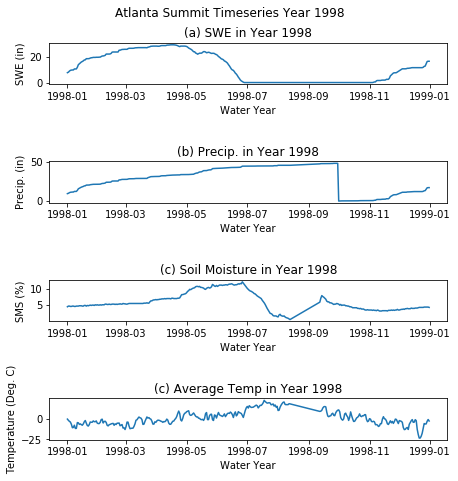

In [3]:
data1 = data_1.set_index('Date')

#Sample year before fire: 1998
s98 = data1['1998']
prec_s98 = s98['Prec ']
sms_s98 = s98['SMS8']
swe_s98 = s98['SWE (in)']
temp_s98 = s98['TAVG']
#plot sample year before fire
plt.figure(figsize=(15,15))
fig1,axs= plt.subplots(4, 1, figsize=(7,7))
fig1.subplots_adjust(wspace=1)
fig1.suptitle('Atlanta Summit Timeseries Year 1998')

axs[0].plot(swe_s98)
axs[0].set_title('(a) SWE in Year 1998')
axs[0].set_xlabel('Water Year')
axs[0].set_ylabel('SWE (in)')

axs[1].plot(prec_s98)
axs[1].set_title('(b) Precip. in Year 1998')
axs[1].set_xlabel('Water Year')
axs[1].set_ylabel('Precip. (in)')

axs[2].plot(sms_s98)
axs[2].set_title('(c) Soil Moisture in Year 1998')
axs[2].set_xlabel('Water Year')
axs[2].set_ylabel('SMS (%)')

axs[3].plot(temp_s98)
axs[3].set_title('(c) Average Temp in Year 1998')
axs[3].set_xlabel('Water Year')
axs[3].set_ylabel('Temperature (Deg. C)')
plt.tight_layout(pad=3.0)


<Figure size 1080x1080 with 0 Axes>

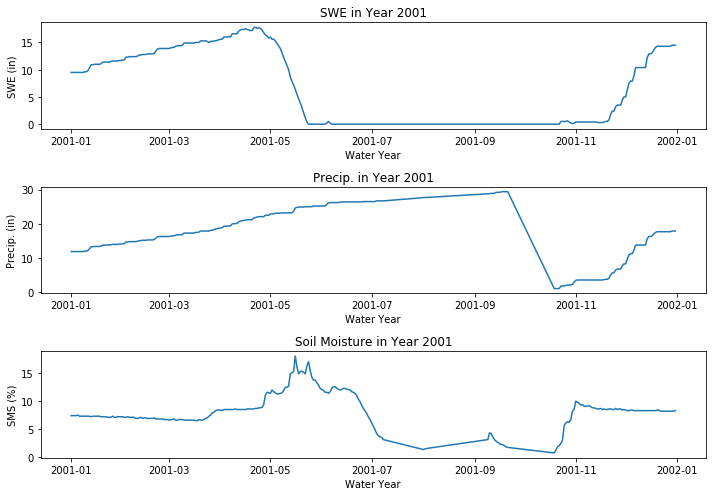

In [4]:
#Sample year before fire: 2002
s01 = data1['2001']
prec_s01  = s01['Prec ']
sms_s01  = s01['SMS8']
swe_s01  = s01['SWE (in)']

#plot sample year before fire
plt.figure(figsize=(15,15))
fig1,axs= plt.subplots(3, 1, figsize=(10,7))
fig1.subplots_adjust(wspace=1)
#fig1.suptitle('Year 1998')

axs[0].plot(swe_s01)
axs[0].set_title('SWE in Year 2001')
axs[0].set_xlabel('Water Year')
axs[0].set_ylabel('SWE (in)')

axs[1].plot(prec_s01)
axs[1].set_title('Precip. in Year 2001')
axs[1].set_xlabel('Water Year')
axs[1].set_ylabel('Precip. (in)')

axs[2].plot(sms_s01)
axs[2].set_title('Soil Moisture in Year 2001')
axs[2].set_xlabel('Water Year')
axs[2].set_ylabel('SMS (%)')

plt.tight_layout()


# Sample Years After Fire

<Figure size 1440x1080 with 0 Axes>

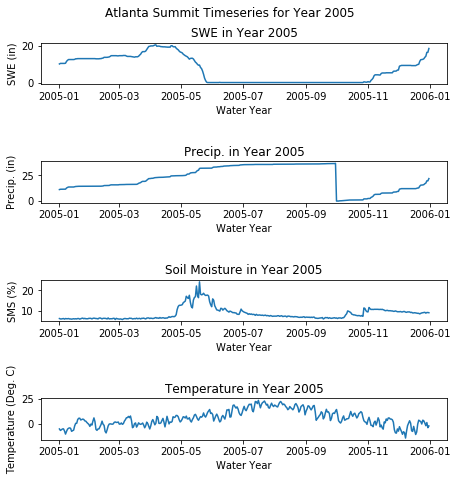

In [5]:
data2 = data_2.set_index('Date')

#Sample year after fire: 2005
s04 = data2['2005']
prec_s04  = s04['Prec (in) ']
sms_s04  = s04['SMS8']
swe_s04  = s04['SWE (in)']
temp_s04 = s04['TAVG']
#plot sample year before fire
plt.figure(figsize=(20,15))
fig1,axs= plt.subplots(4, 1, figsize=(7,7))
fig1.subplots_adjust(wspace=1)
fig1.suptitle('Atlanta Summit Timeseries for Year 2005')

axs[0].plot(swe_s04)
axs[0].set_title('SWE in Year 2005')
axs[0].set_xlabel('Water Year')
axs[0].set_ylabel('SWE (in)')

axs[1].plot(prec_s04)
axs[1].set_title('Precip. in Year 2005')
axs[1].set_xlabel('Water Year')
axs[1].set_ylabel('Precip. (in)')

axs[2].plot(sms_s04)
axs[2].set_title('Soil Moisture in Year 2005')
axs[2].set_xlabel('Water Year')
axs[2].set_ylabel('SMS (%)')

axs[3].plot(temp_s04)
axs[3].set_title('Temperature in Year 2005')
axs[3].set_xlabel('Water Year')
axs[3].set_ylabel('Temperature (Deg. C)')
plt.tight_layout(pad=3.0)


<Figure size 1440x1080 with 0 Axes>

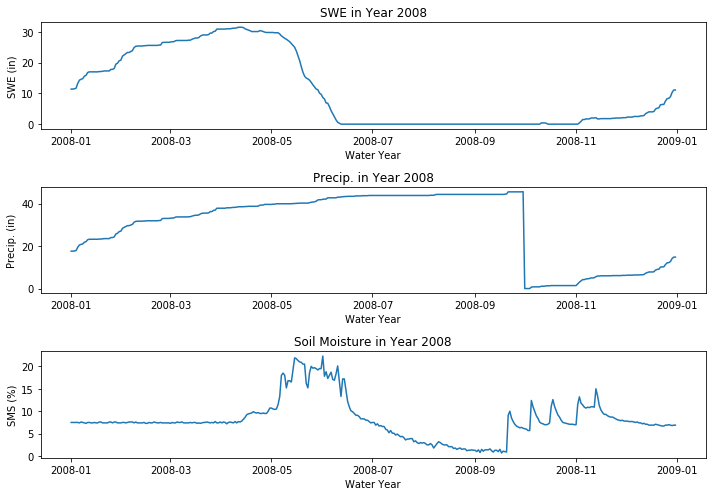

In [6]:

#Sample year after fire: 2008
s08 = data2['2008']
prec_s08  = s08['Prec (in) ']
sms_s08  = s08['SMS8']
swe_s08  = s08['SWE (in)']

#plot sample year before fire
plt.figure(figsize=(20,15))
fig1,axs= plt.subplots(3, 1, figsize=(10,7))
fig1.subplots_adjust(wspace=1)
#fig1.suptitle('Year 1998')

axs[0].plot(swe_s08)
axs[0].set_title('SWE in Year 2008')
axs[0].set_xlabel('Water Year')
axs[0].set_ylabel('SWE (in)')

axs[1].plot(prec_s08)
axs[1].set_title('Precip. in Year 2008')
axs[1].set_xlabel('Water Year')
axs[1].set_ylabel('Precip. (in)')

axs[2].plot(sms_s08)
axs[2].set_title('Soil Moisture in Year 2008')
axs[2].set_xlabel('Water Year')
axs[2].set_ylabel('SMS (%)')

plt.tight_layout()


# Calculate Annual Change in Soil Moisture (D_SMS)

In [7]:
# Calc Delta SMS by finding difference in max n min.
annual_1 = data1.resample('Y').sum()
data1_Max = data1.resample('Y').max()
data1_Min = data1.resample('Y').min()
data1_dif = data1_Max - data1_Min
data1_dif
D_SMS1 = data1_dif['SMS8']
#repeat for after data
annual_2 = data2.resample('Y').sum()
data2_Max = data2.resample('Y').max()
data2_Min = data2.resample('Y').min()
data2_dif = data2_Max - data2_Min
data2_dif
D_SMS2 = data2_dif['SMS8']
annual_2

,Site Id,SWE (in),Prec (in),TOBS,TMAX,TMIN,TAVG,Snow Depth,SMS8,SMS20,Unnamed: 11
Date,,,,,,,,,,,
2004-12-31,36720,303.9,1507.2,235.8,963.8,5.0,415.5,1221,862.1,691.3,0.0
2005-12-31,111690,2558.8,7979.3,1370.5,3985.8,493.7,2058.6,8979,3044.0,2533.9,0.0
2006-12-31,111690,5179.2,13466.3,1320.5,4001.4,464.1,2067.6,15673,3135.5,2706.7,0.0
2007-12-31,111690,2532.7,8173.9,1416.5,4188.8,556.0,2247.4,8261,2733.0,2399.3,0.0
2008-12-31,111996,3950.5,10924.1,882.1,3549.3,-3.0,1623.7,12466,2972.7,2422.1,0.0
2009-12-31,111690,3272.8,9982.0,660.4,3309.3,-156.4,1473.6,10402,2980.4,2272.0,0.0
2010-12-31,111690,3163.7,9835.3,770.5,3199.0,-35.4,1441.8,10728,2553.5,1951.2,0.0
2011-12-31,111690,4725.9,12245.4,695.5,3173.9,-190.5,1361.8,13690,3102.9,2290.2,0.0
2012-12-31,111996,3872.3,11422.3,1080.6,3646.6,325.3,1863.3,12221,2731.9,1968.0,0.0


# Quantifying Distribution of DSMS, Precip, SWE

In [8]:
# Create histogram for annual change in soil moisture (D_SMS)
# Combine DSMS between periods
D_SMS12 = np.concatenate((D_SMS1,D_SMS2))

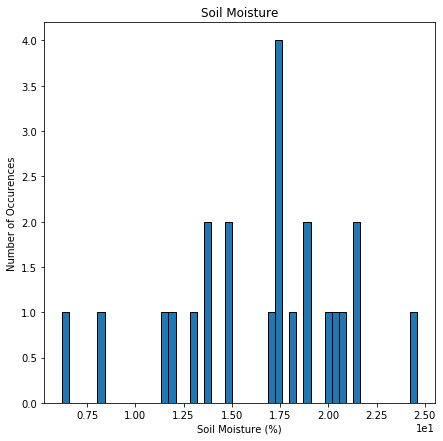

In [9]:

# Define the number of bins for the histogram.
nbins = 50
# Create a new figure.
plt.figure(figsize=(7,7))
plt.hist(D_SMS12, nbins, ec='black')
plt.title('Soil Moisture')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

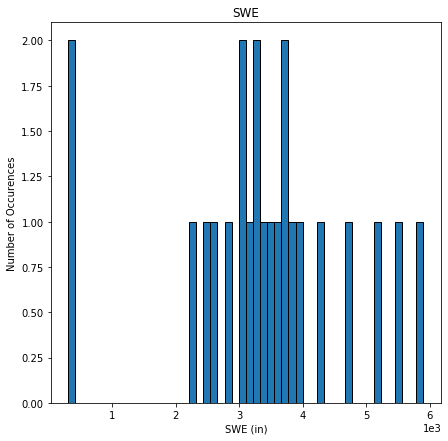

In [10]:
# Create histogram for annual sum of SWE
#Combine before and after data
swe_data12 = np.concatenate((annual_1['SWE (in)'],annual_2['SWE (in)']))
# Define the number of bins for the histogram.
nbins = 50
plt.figure(figsize=(7,7))
plt.hist(swe_data12, nbins, ec="black")
plt.title('SWE')
plt.xlabel('SWE (in)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

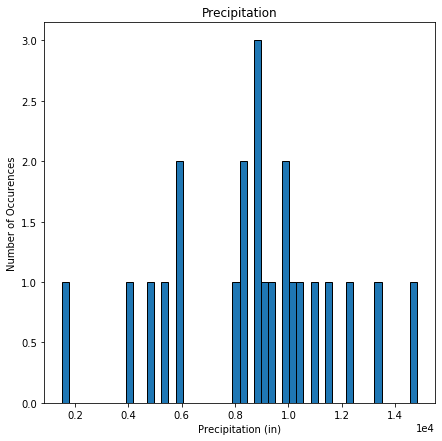

In [11]:
# Create histogram for annual sum of precip
# Combine periods
prec_data12 = np.concatenate((annual_1['Prec '], annual_2['Prec (in) ']))

nbins = 50
plt.figure(figsize=(7,7))
plt.hist(prec_data12, nbins, ec="black")
plt.title('Precipitation')
plt.xlabel('Precipitation (in)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

<Figure size 1440x1080 with 0 Axes>

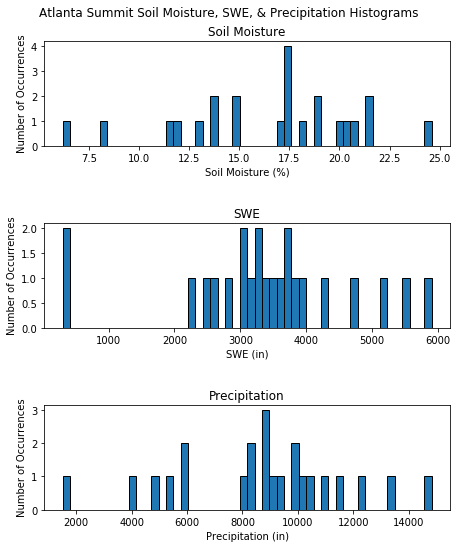

In [12]:
#plot sample year before fire
plt.figure(figsize=(20,15))
fig1,axs= plt.subplots(3, 1, figsize=(7,8))
fig1.subplots_adjust(wspace=1)
fig1.suptitle('Atlanta Summit Soil Moisture, SWE, & Precipitation Histograms')

axs[0].hist(D_SMS12, nbins, ec='black')
axs[0].set_title('Soil Moisture')
axs[0].set_xlabel('Soil Moisture (%)')
axs[0].set_ylabel('Number of Occurrences')

axs[1].hist(swe_data12, nbins, ec='black')
axs[1].set_title('SWE')
axs[1].set_xlabel('SWE (in)')
axs[1].set_ylabel('Number of Occurrences')

axs[2].hist(prec_data12, nbins, ec='black')
axs[2].set_title('Precipitation')
axs[2].set_xlabel('Precipitation (in)')
axs[2].set_ylabel('Number of Occurrences')

plt.tight_layout(pad=3.0)


# Hypothesis Testing: Is there a change between the means between the two periods?

Create a null and an alternative hypothesis. Use a two sample test, and to set at 5%. This will be a two-sided
test since we don't know the direction of the change.

α

H0: μpre = μpost
H1: μpre ≠ μpost

# 1. Change in Soil Moisture (D_SMS)

# A: T-Distribution Test (Parameteric Test)

Since n<30, perform two sample t-test, two sided t-test with alpha = 0.05

In [13]:
np.var(D_SMS1)

14.162448979591838

In [14]:
np.var(D_SMS2)

16.137773437500005

In [15]:
#Unequal Variance so we can use t-test
st.ttest_ind(D_SMS1,D_SMS2, equal_var = False)

Ttest_indResult(statistic=-2.116887925301833, pvalue=0.0563383430986524)

In [16]:
n = len(D_SMS1)
m = len(D_SMS2)
print(n)
print(m)

7
16


In [17]:
#T_alpha/2

#2-tail, alpha = 0.05, alpha/2 = 0.025
t_alpha = st.t.ppf(1-0.025, 21) #dof = m+n-2 = 7 + 16 - 2 = 21

print('t_alpha =')
print(t_alpha)

t_alpha =
2.079613844727662


if p<= alpha, reject H0 (different dist.)
if p>alpha, cannot reject H0 (same dist.)
abs(t-stat) > critical value, reject H0
abs(t-stat) <= critical value, fail to reject H0

since p (0.0563) is equal to  (0.05), we reject H0 
since abs. t-stat (2.11) is greater than t-alpha critical value (2.079), we reject H0

# B: Wilcoxon Rank Sum Test (Non-Parametric)

In [18]:
w, p_w = st.ranksums(D_SMS1,D_SMS2)
# this returns w, the test statistic z presuming this is a large enough sample that this is
# normally distributed, and p_w, the two-side p-value of the test
z_w = st.norm.ppf(1-p_w)
# Critical value
print('Test stat =', w)
print('Critical value = ', z_w)
print('p-value = ', p_w)


Test stat = -2.204905245777501
Critical value =  1.9194968175119227
p-value =  0.027460744334305055


p-value is less than alpha (0.05) so we reject the null hypothesis that there is no change between the means of the two periods. 

# 2. Precipitation

# A: T-Test

In [19]:
prec_1 = annual_1['Prec ']
prec_2 = annual_2['Prec (in) ']
print('Variance in precipitation before fire =', np.var(prec_1))
print('Variance in precipitation before fire =' , np.var(prec_2))

Variance in precipitation before fire = 2708949.8306122506
Variance in precipitation before fire = 7887744.981875002


In [20]:
#Unequal Variance so we can use t-test
st.ttest_ind(prec_1, prec_2, equal_var = False)

Ttest_indResult(statistic=-3.699607875313596, pvalue=0.0016115911287157482)

In [21]:
#T_alpha/2

#2-tail, alpha = 0.05, alpha/2 = 0.025
t_alpha = st.t.ppf(1-0.025, 21) #dof = m+n-2 = 7 + 16 - 2 = 21

print('t_alpha =')
print(t_alpha)

t_alpha =
2.079613844727662


Rule : if p<= alpha, reject H0 (different dist.)
if p>alpha, cannot reject H0 (same dist.)
abs(t-stat) > critical value, reject H0
abs(t-stat) <= critical value, fail to reject H0

# t-stat conclusion:
since p (0.0016) is less than  (0.05), we reject H0 
since abs. of t-stat (3.699) > t-alpha critical value (2.079),  we reject H0. We would need to adjust to confidence bounds of 99.84% to accept H0. 

# B: Wilcoxon Test

In [22]:
w, p_w = st.ranksums(prec_1, prec_2)
# this returns w, the test statistic z presuming this is a large enough sample that this is
# normally distributed, and p_w, the two-side p-value of the test
z_w = st.norm.ppf(1-p_w)
# Critical value
print('Test stat =', w)
print('Critical value = ', z_w)
print('p-value = ', p_w)


Test stat = -2.9398736610366685
Critical value =  2.718043420363247
p-value =  0.003283460986069036


p-value (0.003) is less than alpha (0.05) so we reject the null hypothesis that there is no change between the means of the two periods. 

# 3. SWE

# A: T-Test

In [23]:
swe_1 = annual_1['SWE (in)']
swe_2 = annual_2['SWE (in)']
print('Variance in SWE before fire =', np.var(swe_1))
print('Variance in SWE before fire =' , np.var(swe_2))

Variance in SWE before fire = 2232666.771428572
Variance in SWE before fire = 1478161.2775000017


In [24]:
#Unequal Variance so we can use t-test
st.ttest_ind(swe_1, swe_2, equal_var = False)

Ttest_indResult(statistic=-0.35872378780495673, pvalue=0.7277798259515167)

In [25]:
#T_alpha/2

#2-tail, alpha = 0.05, alpha/2 = 0.025
t_alpha = st.t.ppf(1-0.025, 21) #dof = m+n-2 = 7 + 16 - 2 = 21

print('t_alpha =')
print(t_alpha)

t_alpha =
2.079613844727662


Rule : if p<= alpha, reject H0 (different dist.)
if p>alpha, cannot reject H0 (same dist.)
abs(t-stat) > critical value, reject H0
abs(t-stat) <= critical value, fail to reject H0

# t-stat conclusion:
since p (0.7277) >  (0.05), we fail to reject H0 
since abs. of t-stat (0.358) < t-alpha critical value (2.079),  we fail to reject H0. We would need to adjust to confidence bounds of 64.2% to reject H0. 

# B: Wilcoxon Test

In [26]:
w, p_w = st.ranksums(swe_1, swe_2)
# this returns w, the test statistic z presuming this is a large enough sample that this is
# normally distributed, and p_w, the two-side p-value of the test
z_w = st.norm.ppf(1-p_w)
# Critical value
print('Test stat =', w)
print('Critical value = ', z_w)
print('p-value = ', p_w)


Test stat = -0.1336306209562122
Critical value =  -1.2464188584556972
p-value =  0.8936946693232326


p-value (0.893) is greater than alpha (0.05) so we fail to reject the null hypothesis that there is no change between the means of the two periods. 

# 4. Temperature

In [27]:
temp_1 = annual_1['TAVG']
temp_2 = annual_2['TAVG']
print('Variance in SWE before fire =', np.var(temp_1))
print('Variance in SWE before fire =' , np.var(temp_2))
#Unequal Variance so we can use t-test
st.ttest_ind(temp_1,temp_2, equal_var = False)
#T_alpha/2
print(np.mean(temp_1))
print(np.mean(temp_2))

Variance in SWE before fire = 34897.88979591832
Variance in SWE before fire = 178073.67214843733
135.9857142857142
1721.9312499999996


In [28]:

#2-tail, alpha = 0.05, alpha/2 = 0.025
t_alpha = st.t.ppf(1-0.025, 21) #dof = m+n-2 = 7 + 16 - 2 = 21

print('t_alpha =', t_alpha)

t_alpha = 2.079613844727662


In [29]:
# Wilcoxon
w, p_w = st.ranksums(temp_1,temp_2)
# this returns w, the test statistic z presuming this is a large enough sample that this is
# normally distributed, and p_w, the two-side p-value of the test
z_w = st.norm.ppf(1-p_w)
# Critical value
print('Test stat =', w)
print('Critical value = ', z_w)
print('p-value = ', p_w)


Test stat = -3.7416573867739413
Critical value =  3.5637305550374814
p-value =  0.0001828106329818348


# Summary of Hypothesis tests:

Null hypothesis: there was no change in means between the period before fire and after fire for the following measured variables

1. D_SMS (annual change in soil moisture) : REJECT NULL
-this means there was a change in soil moisture after year of fire event
2. Annual Precipitation : REJECT NULL
-this means there was a change in precipitation after year of fire event
3. Annual SWE : FAIL TO REJECT NULL
-this means there was no change in SWE after year of fire event

In [30]:
prec_mean1 = np.mean(prec_1)
prec_mean2 = np.mean(prec_2)
print(np.mean(D_SMS1))
print(np.mean(D_SMS2))


13.757142857142856
17.68125


# Plotting Precip. vs. Change in Soil Moisture

# Before Fire

In [52]:
n = D_SMS1.size;
B1 = (n* np.sum(D_SMS1*prec_1) - np.sum(D_SMS1)*np.sum(prec_1))/(n*np.sum(prec_1**2) - (np.sum(prec_1))**2);
B0 = np.mean(D_SMS1) - B1*np.mean(prec_1);
x = np.linspace(np.min(prec_1), np.max(prec_1),n)
y = B0 + B1*x
print('B1 is')
print(B1)
print('B0 is')
print(B0)


B1 is
-0.00015510694735921082
B0 is
14.715001378932595


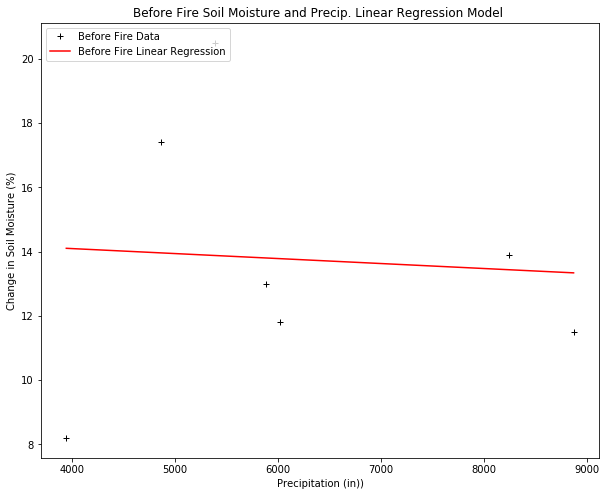

In [32]:
# plot 
plt.figure(figsize=(10,8))
plt.plot(prec_1,D_SMS1,'k+',label='Before Fire Data');
#label
plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('Precipitation (in))')
plt.plot(x,y,'r-',label='Before Fire Linear Regression');
plt.title('Before Fire Soil Moisture and Precip. Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')


In [33]:
#Calc residuals of lin reg
r1p = D_SMS1 - (B0+B1*(prec_1))

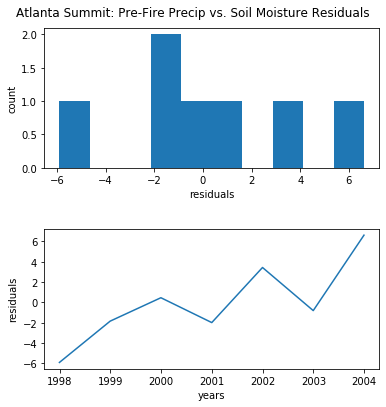

In [34]:
# Check that residuals are normally distributed
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
f.suptitle('Atlanta Summit: Pre-Fire Precip vs. Soil Moisture Residuals')
ax1.hist(r1p)
ax1.set_xlabel('residuals')
ax1.set_ylabel('count')
ax2.plot(r1p)
ax2.set_xlabel('years')

ax2.set_ylabel('residuals')
f.tight_layout(pad=3.0)

In [35]:
# Check Correlation Coefficient
R, P = st.pearsonr(prec_1, D_SMS1)
print('R = ', R)
print('R squared = ' , R*R)
print('P = ' , P)

R =  -0.0678363625336768
R squared =  0.004601772081800429
P =  0.8851022071834073


0.46% of the variance is explained by the model which tells us that the linear
regression is not a good fit. This is because that 99.54% of the variance is not explained by the model. Our pvalue is quite big indicating that our correlation is significant at the 1.5% confidence interval.


In [36]:
# create series of new test x-values to predict for
p_x1p = np.arange(np.min(x),np.max(x)+1,1)

# Calculate confidence intervals for new test x-series
mean_x1p = np.mean(x) 
n1p = x.size 
t1p = st.t.ppf(0.975, n1p-2) 
sse1p = np.sum(r1p**2) 
st_err1p = np.sqrt(sse1p/(n1p-2)) 
sigma1p = st_err1p**2 * (1 + 1/n1p + ( ( n1p*(p_x1p-mean_x1p)**2 ) / ( n1p*np.sum(x**2) - np.sum(x)**2 ) ) )
confs1p = t1p * np.sqrt(sigma1p)

In [37]:
# Predict y based on test x-values
p_y1p = B1*p_x1p+B0

# Get lower and upper confidence limits based on predicted y and confidence intervals
lower1p = p_y1p - np.abs(confs1p)
upper1p = p_y1p + np.abs(confs1p)

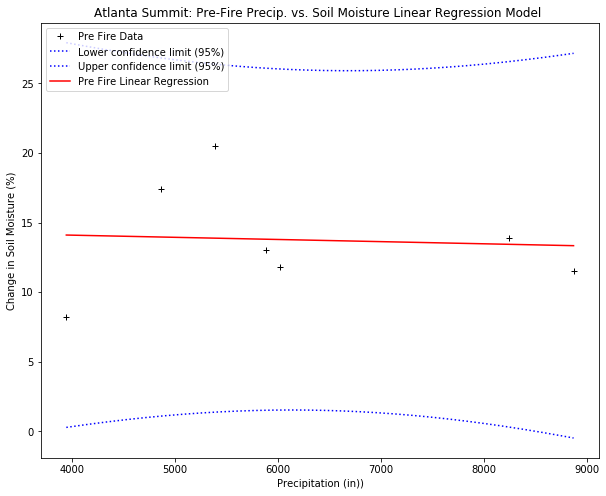

In [38]:
# plot 
plt.figure(figsize=(10,8))

plt.plot(prec_1,D_SMS1, 'k+',label='Pre Fire Data');

# plot confidence limits
plt.plot(p_x1p,lower1p,':b',label='Lower confidence limit (95%)')
plt.plot(p_x1p,upper1p,':b',label='Upper confidence limit (95%)')

#label
plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('Precipitation (in))')
plt.plot(x,y,'r-',label='Pre Fire Linear Regression');
plt.title('Atlanta Summit: Pre-Fire Precip. vs. Soil Moisture Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

# After Fire

In [39]:
n2 = D_SMS2.size;
B12 = (n2* np.sum(D_SMS2*prec_2) - np.sum(D_SMS2)*np.sum(prec_2))/(n2*np.sum(prec_2**2) - (np.sum(prec_2))**2);
B02 = np.mean(D_SMS2) - B12*np.mean(prec_2);
x2 = np.linspace(np.min(prec_2), np.max(prec_2),n2)
y2 = B02 + B12*x2

print('B1 is', B12)
print('B0 is', B02)


B1 is 0.0010405911940118172
B0 is 7.44919483362135


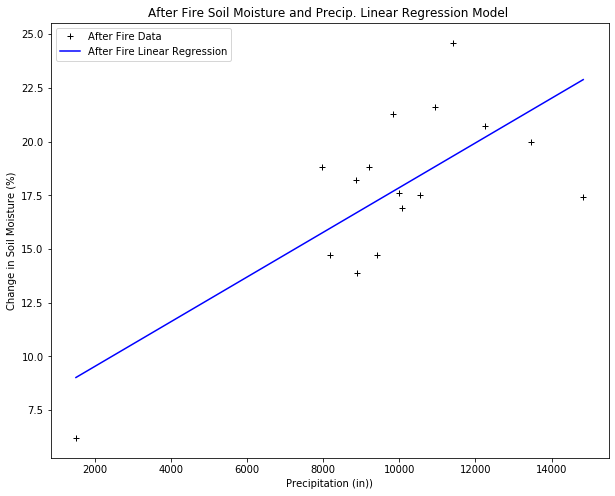

In [40]:
plt.figure(figsize=(10,8))
plt.plot(prec_2,D_SMS2, 'k+',label='After Fire Data');
plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('Precipitation (in))')
plt.plot(x2,y2,'b-',label='After Fire Linear Regression');
plt.title('After Fire Soil Moisture and Precip. Linear Regression Model ')
plt.legend()

R =  0.7275029686994388
R squared =  0.5292605694664966
P =  0.0014029215572346617


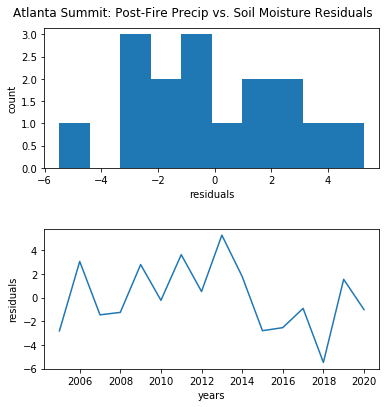

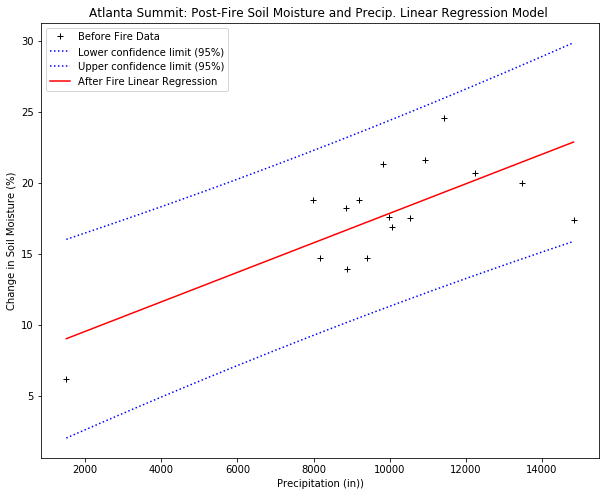

In [41]:
#Calc residuals of lin reg
r2p = D_SMS2 - (B02+B12*(prec_2))

# Check that residuals are normally distributed
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
f.suptitle('Atlanta Summit: Post-Fire Precip vs. Soil Moisture Residuals')
ax1.hist(r2p)
ax1.set_xlabel('residuals')
ax1.set_ylabel('count')
ax2.plot(r2p)
ax2.set_xlabel('years')
ax2.set_ylabel('residuals')
f.tight_layout(pad=3.0)

# Check Correlation Coefficient
R, P = st.pearsonr(prec_2, D_SMS2)
print('R = ', R)
print('R squared = ' , R*R)
print('P = ' , P)

# create series of new test x-values to predict for
p_x2p = np.arange(np.min(x2),np.max(x2)+1,1)

# Calculate confidence intervals for new test x-series
mean_x2p = np.mean(x2) 
n2p = x2.size 
t2p = st.t.ppf(0.975, n2p-2) 
sse2p = np.sum(r2p**2) 
st_err2p = np.sqrt(sse2p/(n2p-2)) 
sigma2p = st_err2p**2 * (1 + 1/n2p + ( ( n2p*(p_x2p-mean_x2p)**2 ) / ( n2p*np.sum(x2**2) - np.sum(x2)**2 ) ) )
confs2p = t2p * np.sqrt(sigma2p)

# Predict y based on test x-values
p_y2p = B12*p_x2p+B02

# Get lower and upper confidence limits based on predicted y and confidence intervals
lower2p = p_y2p - np.abs(confs2p)
upper2p = p_y2p + np.abs(confs2p)

# plot 
plt.figure(figsize=(10,8))

#ploat scatter plot
plt.plot(prec_2,D_SMS2, 'k+',label='Before Fire Data');

# plot confidence limits
plt.plot(p_x2p,lower2p,':b',label='Lower confidence limit (95%)')
plt.plot(p_x2p,upper2p,':b',label='Upper confidence limit (95%)')

#label
plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('Precipitation (in))')
plt.plot(x2,y2,'r-',label='After Fire Linear Regression');
plt.title('Atlanta Summit: Post-Fire Soil Moisture and Precip. Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

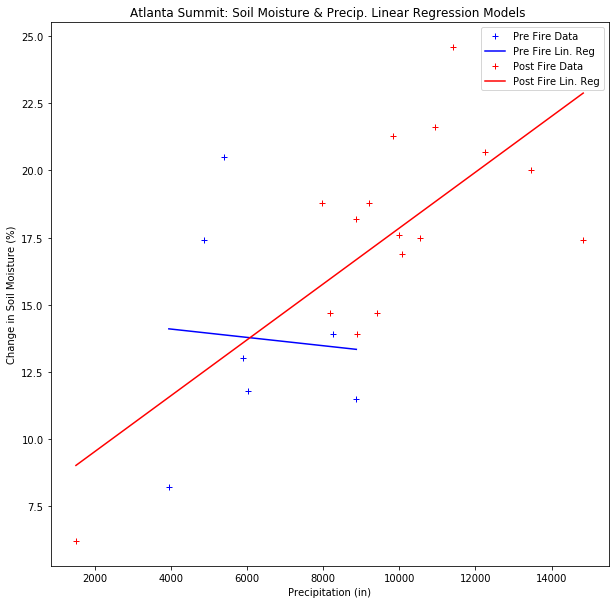

In [42]:
plt.figure(figsize=(10,10))
plt.title('Atlanta Summit: Soil Moisture & Precip. Linear Regression Models ')
plt.plot(prec_1,D_SMS1, 'b+',label='Pre Fire Data');
plt.plot(x,y,'b-',label='Pre Fire Lin. Reg');

plt.plot(prec_2,D_SMS2, 'r+',label='Post Fire Data');
plt.plot(x2,y2,'r-',label='Post Fire Lin. Reg');

plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('Precipitation (in)')
plt.legend(loc="best")

In [43]:
print('The slope of the regression line before fire is =', B1)
print('The slope of the regression line after fire is ', B12)

The slope of the regression line before fire is = -0.00015510694735921082
The slope of the regression line after fire is  0.0010405911940118172


# SWE contribution on Soil Moisture

# Before Fire

In [44]:
n = D_SMS1.size;
B1s = (n* np.sum(D_SMS1*swe_1) - np.sum(D_SMS1)*np.sum(swe_1))/(n*np.sum(swe_1**2) - (np.sum(swe_1))**2);
B0s = np.mean(D_SMS1) - B1*np.mean(swe_1);
xs = np.linspace(np.min(swe_1), np.max(swe_1),n)
ys = B0s + B1s*x
print('B1 is', B1s)
print('B0 is', B0s)


B1 is 0.0006599878118847197
B0 is 14.25641660999742


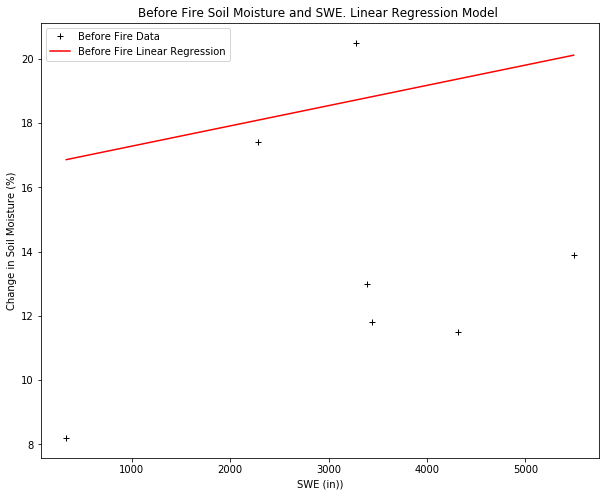

In [45]:
plt.figure(figsize=(10,8))
plt.plot(swe_1,D_SMS1,'k+',label='Before Fire Data');
plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('SWE (in))')
plt.plot(xs,ys,'r-',label='Before Fire Linear Regression');
plt.title('Before Fire Soil Moisture and SWE. Linear Regression Model ')
plt.legend()

R =  0.262046697443917
R squared =  0.06866847164126379
P =  0.5702511453744797


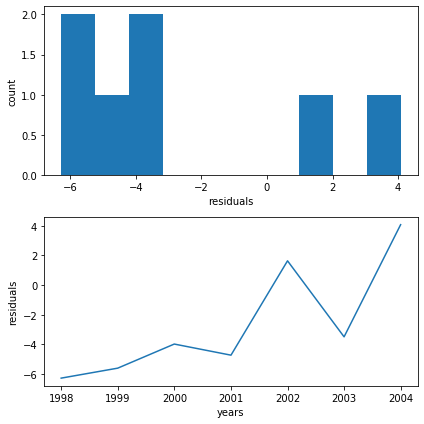

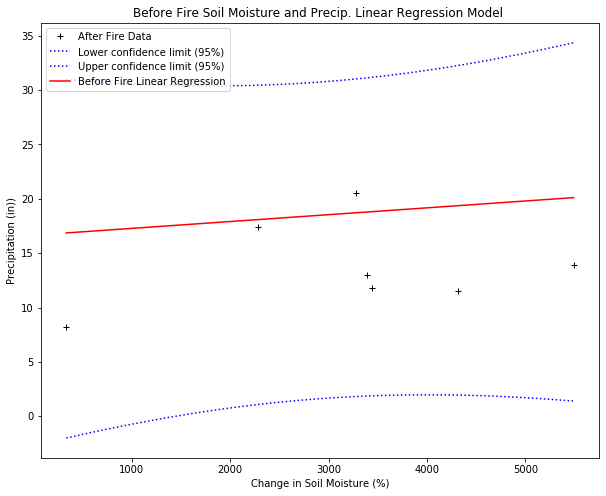

In [46]:
#Calc residuals of lin reg
r1s = D_SMS1 - (B0s+B1s*(swe_1))

# Check that residuals are normally distributed
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.hist(r1s)
ax1.set_xlabel('residuals')
ax1.set_ylabel('count')
ax2.plot(r1s)
ax2.set_xlabel('years')
ax2.set_ylabel('residuals')
f.tight_layout()

# Check Correlation Coefficient
R, P = st.pearsonr(swe_1, D_SMS1)
print('R = ', R)
print('R squared = ' , R*R)
print('P = ' , P)

# create series of new test x-values to predict for
p_x1s = np.arange(np.min(xs),np.max(xs)+1,1)

# Calculate confidence intervals for new test x-series
mean_x1s = np.mean(xs) 
n1s = xs.size 
t1s = st.t.ppf(0.975, n1s-2) 
sse1s = np.sum(r1s**2) 
st_err1s = np.sqrt(sse1s/(n1s-2)) 
sigma1s = st_err1s**2 * (1 + 1/n1s + ( ( n1s*(p_x1s-mean_x1s)**2 ) / ( n1s*np.sum(xs**2) - np.sum(xs)**2 ) ) )
confs1s = t1s * np.sqrt(sigma1s)

# Predict y based on test x-values
p_y1s = B1s*p_x1s+B0s

# Get lower and upper confidence limits based on predicted y and confidence intervals
lower1s = p_y1s - np.abs(confs1s)
upper1s = p_y1s + np.abs(confs1s)

# plot 
plt.figure(figsize=(10,8))

#ploat scatter plot
plt.plot(swe_1,D_SMS1,'k+',label='After Fire Data');

# plot confidence limits
plt.plot(p_x1s,lower1s,':b',label='Lower confidence limit (95%)')
plt.plot(p_x1s,upper1s,':b',label='Upper confidence limit (95%)')

#label
plt.xlabel('Change in Soil Moisture (%)');
plt.ylabel('Precipitation (in))')
plt.plot(xs,ys,'r-',label='Before Fire Linear Regression');
plt.title('Before Fire Soil Moisture and Precip. Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

# After Fire

In [47]:
n2 = D_SMS2.size;
B12s = (n2* np.sum(D_SMS2*swe_2) - np.sum(D_SMS2)*np.sum(swe_2))/(n2*np.sum(swe_2**2) - (np.sum(swe_2))**2);
B02s = np.mean(D_SMS2) - B12*np.mean(swe_2);
x2s = np.linspace(np.min(prec_2), np.max(swe_2),n2)
y2s = B02s + B12s*x2s

print('B1 is', B12s)
print('B0 is', B02s)


B1 is 0.002041499155696832
B0 is 14.075601512749051


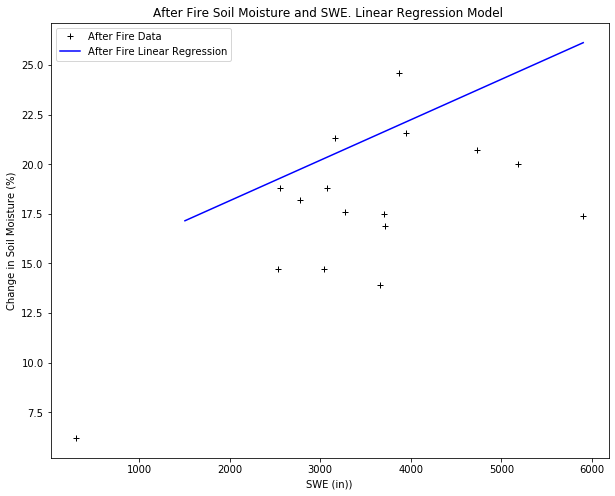

In [48]:
plt.figure(figsize=(10,8))
plt.plot(swe_2,D_SMS2, 'k+',label='After Fire Data');
plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('SWE (in))')
plt.plot(x2s,y2s,'b-',label='After Fire Linear Regression');
plt.title('After Fire Soil Moisture and SWE. Linear Regression Model ')
plt.legend()

R =  0.6178574792229233
R squared =  0.3817478646317051
P =  0.010753479374140463


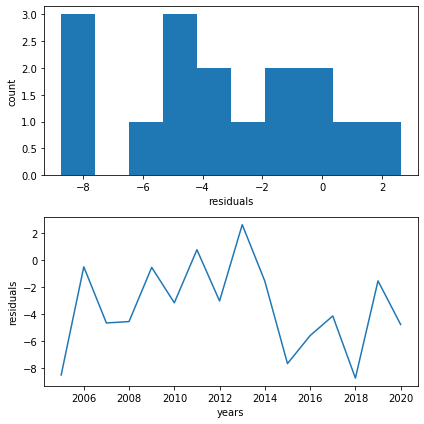

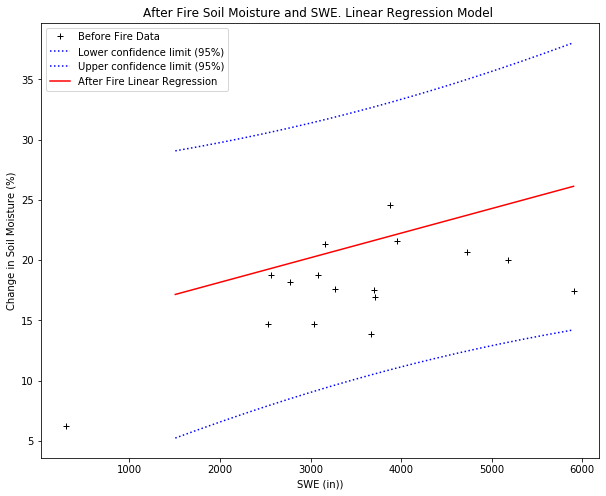

In [49]:
#Calc residuals of lin reg
r2s = D_SMS2 - (B02s+B12s*(swe_2))

# Check that residuals are normally distributed
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.hist(r2s)
ax1.set_xlabel('residuals')
ax1.set_ylabel('count')
ax2.plot(r2s)
ax2.set_xlabel('years')
ax2.set_ylabel('residuals')
f.tight_layout()

# Check Correlation Coefficient
R, P = st.pearsonr(swe_2, D_SMS2)
print('R = ', R)
print('R squared = ' , R*R)
print('P = ' , P)

# create series of new test x-values to predict for
p_x2s = np.arange(np.min(x2s),np.max(x2s)+1,1)

# Calculate confidence intervals for new test x-series
mean_x2s = np.mean(x2s) 
n2s = x2s.size 
t2s = st.t.ppf(0.975, n2s-2) 
sse2s = np.sum(r2s**2) 
st_err2s = np.sqrt(sse2s/(n2s-2)) 
sigma2s = st_err2s**2 * (1 + 1/n2s + ( ( n2s*(p_x2s-mean_x2s)**2 ) / ( n2s*np.sum(x2s**2) - np.sum(x2s)**2 ) ) )
confs2s = t2s * np.sqrt(sigma2s)

# Predict y based on test x-values
p_y2s = B12s*p_x2s+B02s

# Get lower and upper confidence limits based on predicted y and confidence intervals
lower2s = p_y2s - np.abs(confs2s)
upper2s = p_y2s + np.abs(confs2s)

# plot 
plt.figure(figsize=(10,8))

#ploat scatter plot
plt.plot(swe_2,D_SMS2, 'k+',label='Before Fire Data');

# plot confidence limits
plt.plot(p_x2s,lower2s,':b',label='Lower confidence limit (95%)')
plt.plot(p_x2s,upper2s,':b',label='Upper confidence limit (95%)')

#label
plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('SWE (in))')
plt.plot(x2s,y2s,'r-',label='After Fire Linear Regression');
plt.title('After Fire Soil Moisture and SWE. Linear Regression Model ')

# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);

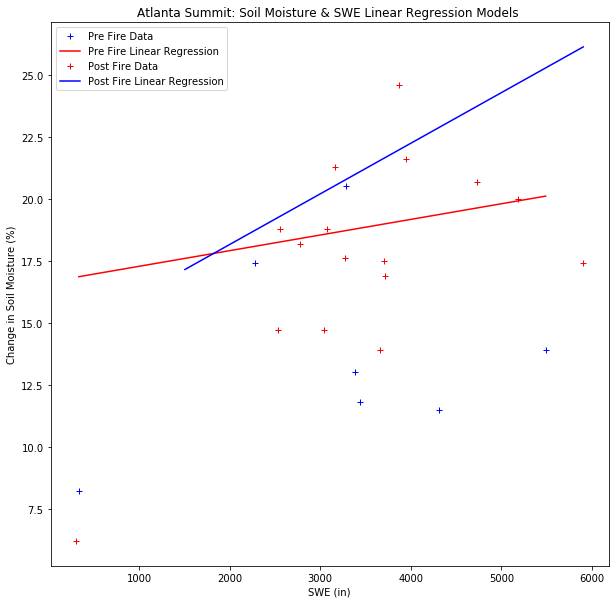

In [50]:
plt.figure(figsize=(10,10))
plt.title('Atlanta Summit: Soil Moisture & SWE Linear Regression Models ')
plt.plot(swe_1,D_SMS1, 'b+',label='Pre Fire Data');
plt.plot(xs,ys,'r-',label='Pre Fire Linear Regression');

plt.plot(swe_2,D_SMS2, 'r+',label='Post Fire Data');
plt.plot(x2s,y2s,'b-',label='Post Fire Linear Regression');

plt.ylabel('Change in Soil Moisture (%)');
plt.xlabel('SWE (in)')
plt.legend()

In [51]:
print('The slope of the regression line before fire is =', B1s)
print('The slope of the regression line after fire is ', B12s)

The slope of the regression line before fire is = 0.0006599878118847197
The slope of the regression line after fire is  0.002041499155696832
